# **Setup**

* https://towardsdatascience.com/understanding-predictive-maintenance-wave-data-feature-engineering-part-1-fd22b6a19323

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from IPython.display import clear_output
from warnings import filterwarnings
filterwarnings('ignore')

# **Generate Vibration Signal**

In [2]:
def generate_vibration_signal(duration, sampling_rate, frequency, amplitude, noise_level, max_wear, wear_threshold):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    
    # Generate a sinusoidal signal
    signal = amplitude * np.sin(2 * np.pi * frequency * t)

    # Add random noise to simulate real-world conditions
    noise = np.random.normal(0, noise_level, signal.shape)
    signal_with_noise = signal + noise
    
    # Simulate equipment wear
    wear = np.linspace(0, max_wear, len(t))
    wear[wear > wear_threshold] = 0  # Reset wear if it exceeds the threshold
    signal_with_wear = signal_with_noise + wear

    return t, signal_with_wear

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


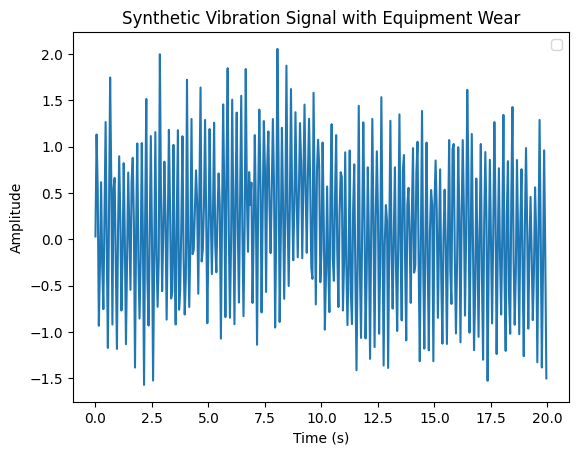

In [4]:
# Parameters
duration = 20         # seconds
sampling_rate = 20    # Hz
frequency = 5         # Hz (vibration frequency)
amplitude = 1.0       # Min Max range
noise_level = 0.3     # Noise factor to increase reality
max_wear = 1          # Maximum wear before reset
wear_threshold = 0.5  # Wear threshold for reset

# Generate synthetic vibration signal with wear and threshold
time, vibration_signal = generate_vibration_signal(duration, sampling_rate, frequency, 
                                                   amplitude, noise_level, max_wear, wear_threshold)

# Plot the signal
plt.plot(time, vibration_signal)
plt.title('Synthetic Vibration Signal with Equipment Wear')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# **Signal Windowing**

## **Window Size=2**

* Too Small Window

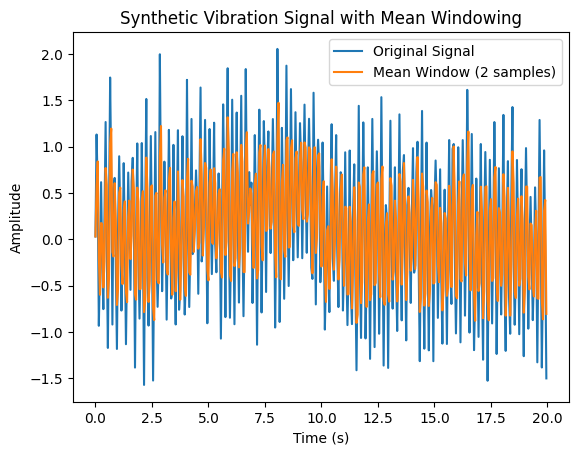

In [5]:
df_windowed = pd.DataFrame({'time': time, 'vibration_signal': vibration_signal})

# Make some experiments
window_size = int(2)  

# Apply mean windowing using the 'rolling' function
df_windowed['mean_amplitude'] = df_windowed['vibration_signal'].rolling(window=window_size, min_periods=1).mean()

# Plot the original signal and the mean windowed signal
plt.plot(df_windowed['time'], df_windowed['vibration_signal'], label='Original Signal')
plt.plot(df_windowed['time'], df_windowed['mean_amplitude'], label=f'Mean Window ({window_size} samples)')
plt.title('Synthetic Vibration Signal with Mean Windowing')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## **Window Size=200**
* Too Big Window 

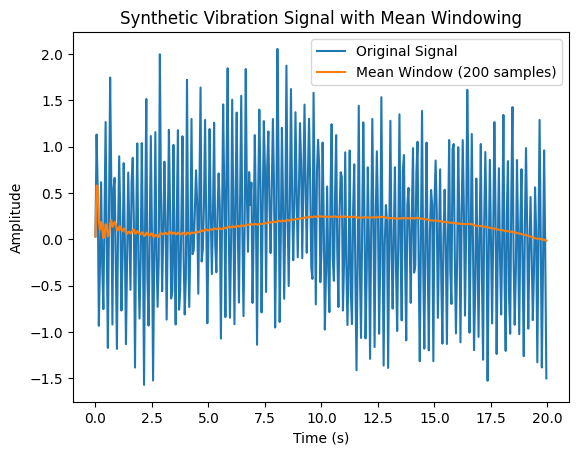

In [6]:
df_windowed = pd.DataFrame({'time': time, 'vibration_signal': vibration_signal})

# Make some experiments
window_size = int(200)  

# Apply mean windowing using the 'rolling' function
df_windowed['mean_amplitude'] = df_windowed['vibration_signal'].rolling(window=window_size, min_periods=1).mean()

# Plot the original signal and the mean windowed signal
plt.plot(df_windowed['time'], df_windowed['vibration_signal'], label='Original Signal')
plt.plot(df_windowed['time'], df_windowed['mean_amplitude'], label=f'Mean Window ({window_size} samples)')
plt.title('Synthetic Vibration Signal with Mean Windowing')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## **Window Size=20**
* Just Right Window Size

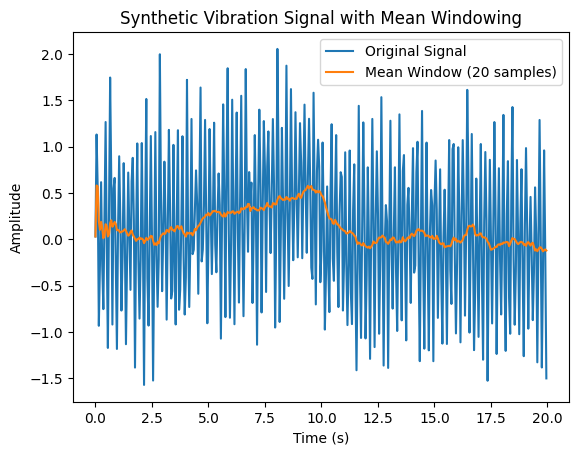

In [7]:
df_windowed = pd.DataFrame({'time': time, 'vibration_signal': vibration_signal})

# Make some experiments
window_size = int(20)  

# Apply mean windowing using the 'rolling' function
df_windowed['mean_amplitude'] = df_windowed['vibration_signal'].rolling(window=window_size, min_periods=1).mean()

# Plot the original signal and the mean windowed signal
plt.plot(df_windowed['time'], df_windowed['vibration_signal'], label='Original Signal')
plt.plot(df_windowed['time'], df_windowed['mean_amplitude'], label=f'Mean Window ({window_size} samples)')
plt.title('Synthetic Vibration Signal with Mean Windowing')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# **Time Domain Signal Features**

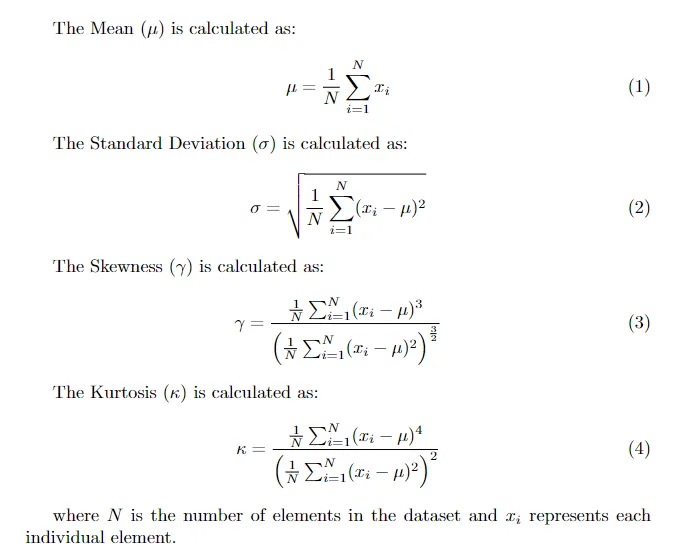

## **Skewness Comparison**

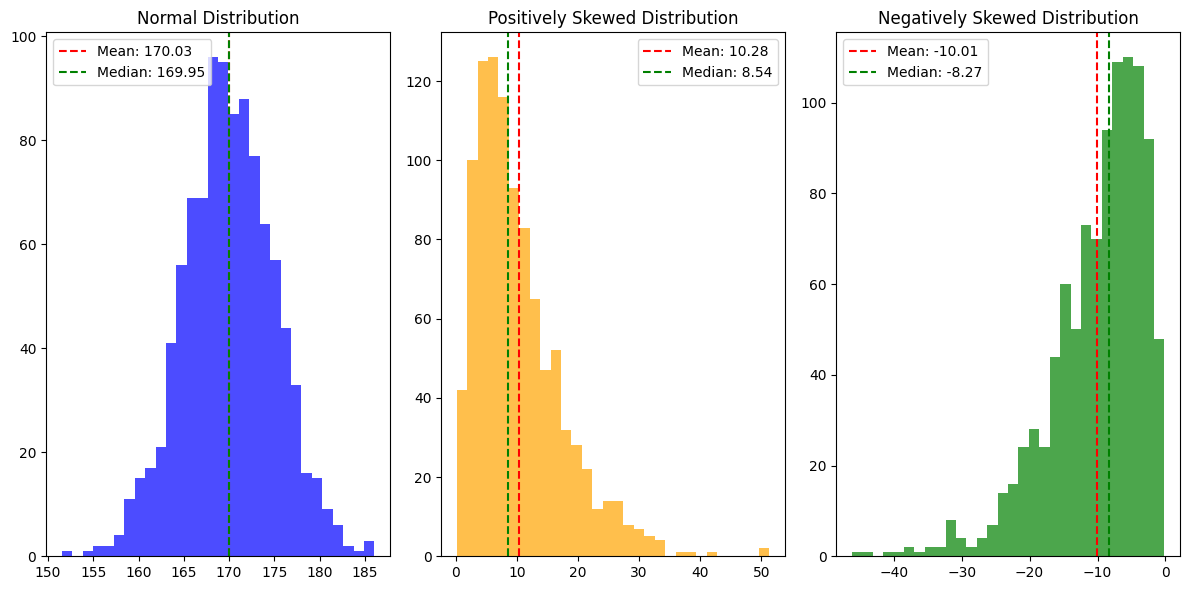

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis

# Set a random seed for reproducibility
np.random.seed(1992)

# Generate synthetic datasets with varying skewness and kurtosis
# Normal distribution
normal_data = np.random.normal(loc=170, scale=5, size=1000)

# Positively skewed distribution                
skewed_data = np.random.gamma(shape=2, scale=5, size=1000)

# Negatively skewed distribution                 
negative_skewed_data = -np.random.gamma(shape=2, scale=5, size=1000)      

# Calculate mean and median for each dataset
normal_mean, normal_median = np.mean(normal_data), np.median(normal_data)
skewed_mean, skewed_median = np.mean(skewed_data), np.median(skewed_data)
negative_skewed_mean, negative_skewed_median = np.mean(negative_skewed_data), np.median(negative_skewed_data)

# Plot the distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(normal_data, bins=30, color='blue', alpha=0.7)
plt.axvline(x=normal_mean, color='red', linestyle='--', label=f'Mean: {normal_mean:.2f}')
plt.axvline(x=normal_median, color='green', linestyle='--', label=f'Median: {normal_median:.2f}')
plt.legend()
plt.title('Normal Distribution')

plt.subplot(1, 3, 2)
plt.hist(skewed_data, bins=30, color='orange', alpha=0.7)
plt.axvline(x=skewed_mean, color='red', linestyle='--', label=f'Mean: {skewed_mean:.2f}')
plt.axvline(x=skewed_median, color='green', linestyle='--', label=f'Median: {skewed_median:.2f}')
plt.legend()
plt.title('Positively Skewed Distribution')

plt.subplot(1, 3, 3)
plt.hist(negative_skewed_data, bins=30, color='green', alpha=0.7)
plt.axvline(x=negative_skewed_mean, color='red', linestyle='--', label=f'Mean: {negative_skewed_mean:.2f}')
plt.axvline(x=negative_skewed_median, color='green', linestyle='--', label=f'Median: {negative_skewed_median:.2f}')
plt.legend()
plt.title('Negatively Skewed Distribution')

plt.tight_layout()
plt.show()

## **Kurtosis Comparison**

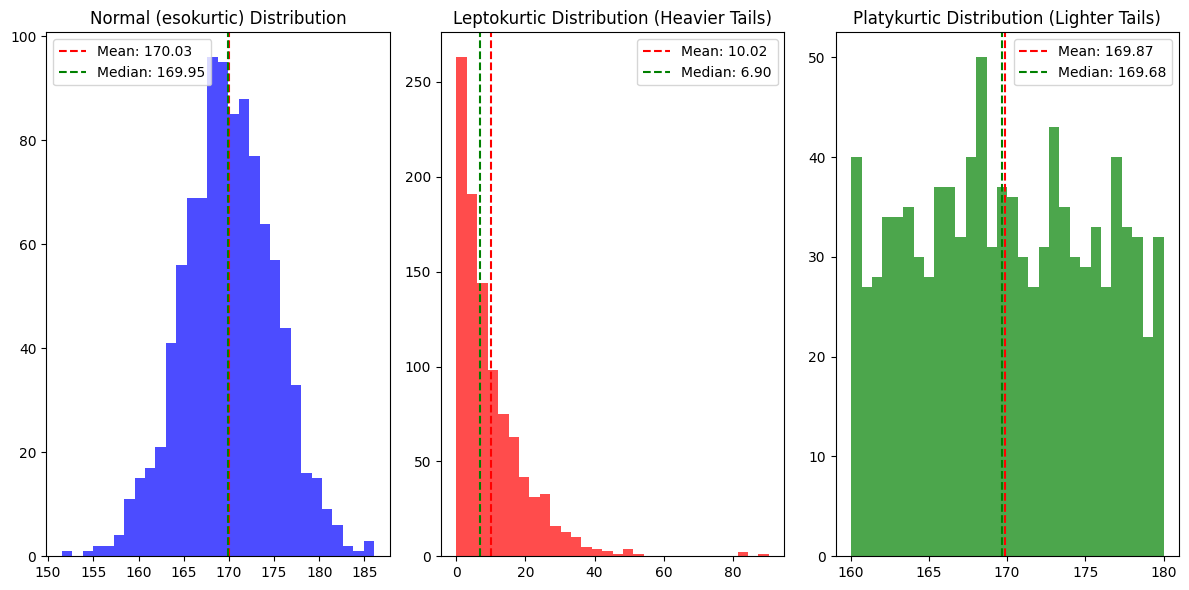

In [9]:
# Leptokurtic distribution (heavier tails)
heavy_tails_data = np.random.exponential(scale=10, size=1000)

# Platykurtic distribution (lighter tails)
light_tails_data = np.random.uniform(low=160, high=180, size=1000)        

# Calculate mean and median for each dataset
normal_mean, normal_median = np.mean(normal_data), np.median(normal_data)
heavy_tails_mean, heavy_tails_median = np.mean(heavy_tails_data), np.median(heavy_tails_data)
light_tails_mean, light_tails_median = np.mean(light_tails_data), np.median(light_tails_data)

# Plot the distributions with mean and median
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(normal_data, bins=30, color='blue', alpha=0.7)
plt.axvline(x=normal_mean, color='red', linestyle='--', label=f'Mean: {normal_mean:.2f}')
plt.axvline(x=normal_median, color='green', linestyle='--', label=f'Median: {normal_median:.2f}')
plt.legend()
plt.title('Normal (esokurtic) Distribution')

plt.subplot(1, 3, 2)
plt.hist(heavy_tails_data, bins=30, color='red', alpha=0.7)
plt.axvline(x=heavy_tails_mean, color='red', linestyle='--', label=f'Mean: {heavy_tails_mean:.2f}')
plt.axvline(x=heavy_tails_median, color='green', linestyle='--', label=f'Median: {heavy_tails_median:.2f}')
plt.legend()
plt.title('Leptokurtic Distribution (Heavier Tails)')

plt.subplot(1, 3, 3)
plt.hist(light_tails_data, bins=30, color='green', alpha=0.7)
plt.axvline(x=light_tails_mean, color='red', linestyle='--', label=f'Mean: {light_tails_mean:.2f}')
plt.axvline(x=light_tails_median, color='green', linestyle='--', label=f'Median: {light_tails_median:.2f}')
plt.legend()
plt.title('Platykurtic Distribution (Lighter Tails)')

plt.tight_layout()
plt.show()

## **Signal Data Distribution Comparison**

In [10]:
# Calculate skewness and kurtosis for each dataset
normal_skewness = skew(normal_data)
normal_kurtosis = kurtosis(normal_data)

skewed_skewness = skew(skewed_data)
skewed_kurtosis = kurtosis(skewed_data)

negative_skewness = skew(negative_skewed_data)
negative_kurtosis = kurtosis(negative_skewed_data)

heavy_tails_skewness = skew(heavy_tails_data)
heavy_tails_kurtosis = kurtosis(heavy_tails_data)

light_tails_skewness = skew(light_tails_data)
light_tails_kurtosis = kurtosis(light_tails_data)

# Print the calculated values
print("Normal Distribution:")
print(f"Skewness: {normal_skewness}, Kurtosis: {normal_kurtosis}\n")

print("Positively Skewed Distribution:")
print(f"Skewness: {skewed_skewness}, Kurtosis: {skewed_kurtosis}\n")

print("Negatively Skewed Distribution:")
print(f"Skewness: {negative_skewness}, Kurtosis: {negative_kurtosis}\n")

print("Leptokurtic Distribution (Heavier Tails):")
print(f"Skewness: {heavy_tails_skewness}, Kurtosis: {heavy_tails_kurtosis}\n")

print("Platykurtic Distribution (Lighter Tails):")
print(f"Skewness: {light_tails_skewness}, Kurtosis: {light_tails_kurtosis}\n")

Normal Distribution:
Skewness: -0.023747118662200778, Kurtosis: 0.13562505575972805

Positively Skewed Distribution:
Skewness: 1.3753017138403605, Kurtosis: 2.735797911478558

Negatively Skewed Distribution:
Skewness: -1.3357153593369862, Kurtosis: 2.4060280852590727

Leptokurtic Distribution (Heavier Tails):
Skewness: 2.344310371944749, Kurtosis: 9.967493010181288

Platykurtic Distribution (Lighter Tails):
Skewness: 0.024237350132264072, Kurtosis: -1.1455613412248278



## **Statistics With Rolling Window**

In [11]:
# Define Function
def calculate_rolling_statistics(signal, window_size):
    
    df = pd.DataFrame({'signal': signal})
    rolling_stats = df['signal'].rolling(window=window_size, min_periods=1)

    mean_values = rolling_stats.mean()
    std_dev_values = rolling_stats.std()
    skewness_values = rolling_stats.apply(skew, raw=True)
    kurtosis_values = rolling_stats.apply(kurtosis, raw=True)

    return mean_values, std_dev_values, skewness_values, kurtosis_values

window_size = 20  

# Calculate rolling statistics
rolling_means, rolling_std_devs, rolling_skewness, rolling_kurtosis = calculate_rolling_statistics(vibration_signal, window_size)

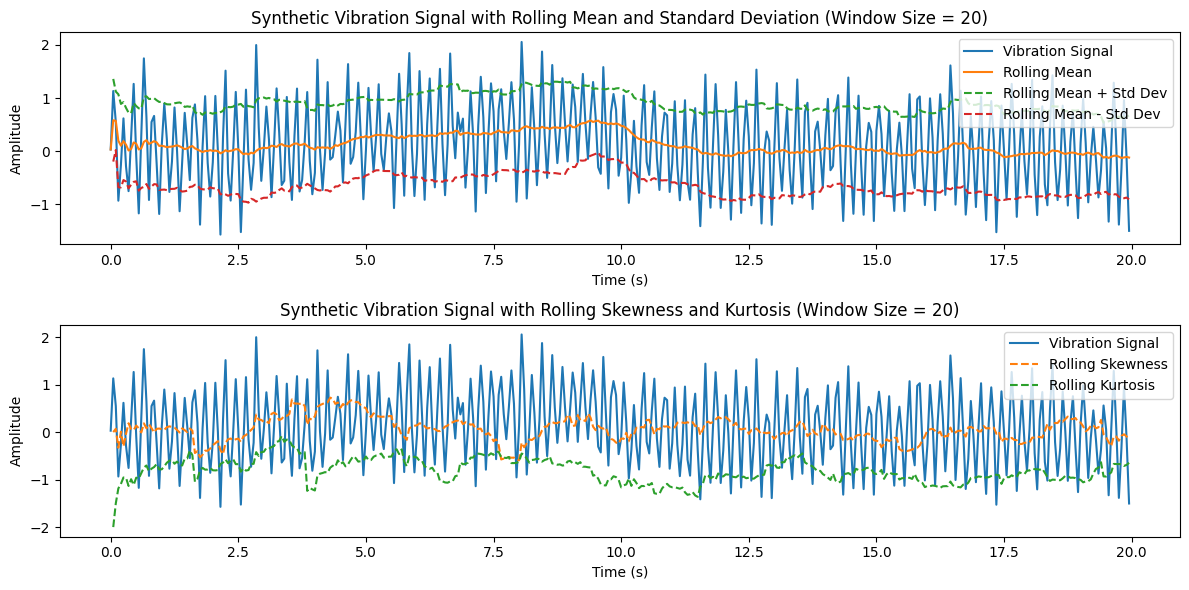

In [12]:
# Plot the signal and rolling statistics
plt.figure(figsize=(12, 6))

# Plot Rolling Mean, Rolling Mean + Std Dev, Rolling Mean - Std Dev
plt.subplot(2, 1, 1)
plt.plot(time[:len(rolling_means)], vibration_signal[:len(rolling_means)], label='Vibration Signal')
plt.plot(time[:len(rolling_means)], rolling_means, label='Rolling Mean')
plt.plot(time[:len(rolling_means)], rolling_means + rolling_std_devs, label='Rolling Mean + Std Dev', linestyle='--')
plt.plot(time[:len(rolling_means)], rolling_means - rolling_std_devs, label='Rolling Mean - Std Dev', linestyle='--')
plt.title(f'Synthetic Vibration Signal with Rolling Mean and Standard Deviation (Window Size = {window_size})')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Plot Rolling Skewness and Rolling Kurtosis
plt.subplot(2, 1, 2)
plt.plot(time[:len(rolling_means)], vibration_signal[:len(rolling_means)], label='Vibration Signal')
plt.plot(time[:len(rolling_means)], rolling_skewness, label='Rolling Skewness', linestyle='--')
plt.plot(time[:len(rolling_means)], rolling_kurtosis, label='Rolling Kurtosis', linestyle='--')
plt.title(f'Synthetic Vibration Signal with Rolling Skewness and Kurtosis (Window Size = {window_size})')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

## **Signal - RMS Value**

RMS unveils a single, robust metric that captures the underlying signal power while effectively mitigating noise. This plot serves as a visual testament to the practical efficacy of RMS in enhancing signal clarity and precision across diverse applications.

It’s a handy tool in various fields, from measuring vibrations in machinery to assessing the power of signals.

In [13]:
def calculate_rolling_rms(signal, window_size):
    df = pd.DataFrame({'signal': signal})
    rolling_stats = df['signal'].rolling(window=window_size, min_periods=1)

    rms_values = np.sqrt(rolling_stats.apply(lambda x: np.mean(x**2), raw=True))

    return rms_values

window_size = 20
rolling_rms = calculate_rolling_rms(vibration_signal, window_size)

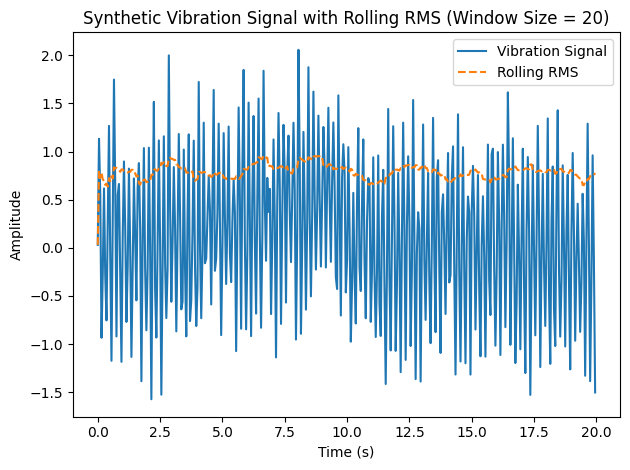

In [14]:
plt.plot(time[:len(rolling_rms)], vibration_signal[:len(rolling_rms)], label='Vibration Signal')
plt.plot(time[:len(rolling_rms)], rolling_rms, label='Rolling RMS', linestyle='--')
plt.title(f'Synthetic Vibration Signal with Rolling RMS (Window Size = {window_size})')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

## **Signal - Crest Factor**

While RMS it gives you the overall intensity, Crest Factor it steps in to highlight the peaks. It’s the ratio of the highest point to the RMS value, telling you how spiky or ‘cresty’ your signal is

Think of CF as the superhero partner that helps you understand the sharp peaks in your data, whether it’s in sound waves, electrical signals, or any other fluctuating measurements.

RMS & CF jointly form a dynamic duo for unraveling the secrets hidden in your data.

In [15]:
def calculate_crest_factor_and_peak(signal, window_size):
    df = pd.DataFrame({'signal': signal})
    rolling_stats = df['signal'].rolling(window=window_size, min_periods=1)

    peak_values = rolling_stats.apply(lambda x: np.max(np.abs(x)), raw=True)
    rms_values = np.sqrt(rolling_stats.apply(lambda x: np.mean(x**2), raw=True))

    crest_factor_values = peak_values / rms_values

    return crest_factor_values, peak_values

# Calculate rolling Crest Factor and Peak values
rolling_crest_factor, rolling_peak_values = calculate_crest_factor_and_peak(vibration_signal, window_size)

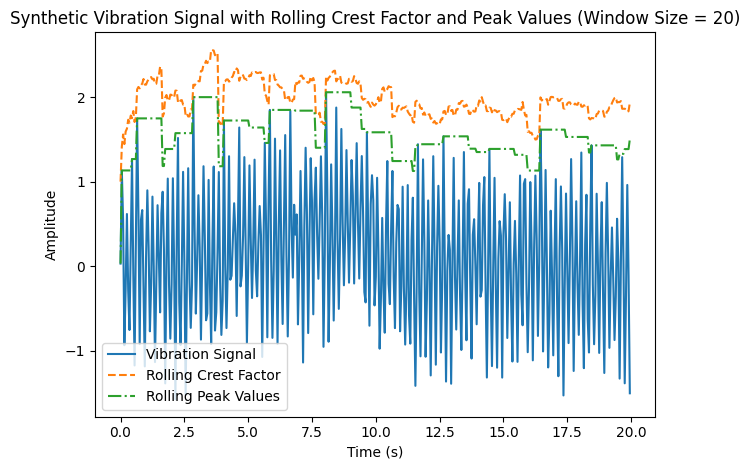

In [16]:
# Plot the vibration signal, rolling Crest Factor, and Peak values

plt.plot(time[:len(rolling_crest_factor)], vibration_signal[:len(rolling_crest_factor)], label='Vibration Signal')
plt.plot(time[:len(rolling_crest_factor)], rolling_crest_factor, label='Rolling Crest Factor', linestyle='--')
plt.plot(time[:len(rolling_peak_values)], rolling_peak_values, label='Rolling Peak Values', linestyle='-.')
plt.title(f'Synthetic Vibration Signal with Rolling Crest Factor and Peak Values (Window Size = {window_size})')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

# **Frequency Domain Signal Features**